In [57]:
import numpy as np
import pandas as pd
from os.path import join

import matplotlib.pyplot as plt

In [53]:
# settings and filepaths
%matplotlib notebook

in_dir = '../../data/raw/temp_sensors/calibration_test_1/'

In [49]:
# functions
def load_temp_log(fname):
    result = pd.read_csv(join(in_dir,fname),skiprows=14,delim_whitespace=True,
                    index_col=0, names = ['Date','Time','Deg_C','RH'])
    dts = pd.to_datetime(result['Date'] + ' ' + result['Time'])
    
    result = result.reindex(columns=['Deg_C','RH'])
    result['datetime'] = dts
    
    result = result.set_index('datetime')
    
    return result

In [61]:
# load temp sensor data
data_1 = load_temp_log('1_warm_test.txt')
data_2 = load_temp_log('2_cool_test.txt')
data_3 = load_temp_log('3_cool_waiting.txt')

In [75]:
begin_time = data_1.index.min()
end_time = data_2.index.max()

In [76]:
data_2.tail()

,Deg_C,RH
datetime,,
2017-06-20 07:16:05,21.0,63.8
2017-06-20 07:21:05,21.1,64.7
2017-06-20 07:26:05,21.2,64.8
2017-06-20 07:31:05,21.2,64.2
2017-06-20 07:36:05,21.3,64.3


In [80]:
mean_1 = data_1.loc[begin_time:end_time,'Deg_C'].mean()
mean_2 = data_2.loc[begin_time:end_time,'Deg_C'].mean()
mean_3 = data_3.loc[begin_time:end_time,'Deg_C'].mean()

In [81]:
print(mean_1, mean_2, mean_3)

23.390419161676636 23.809580838323363 23.95361445783132


<IPython.core.display.Javascript object>


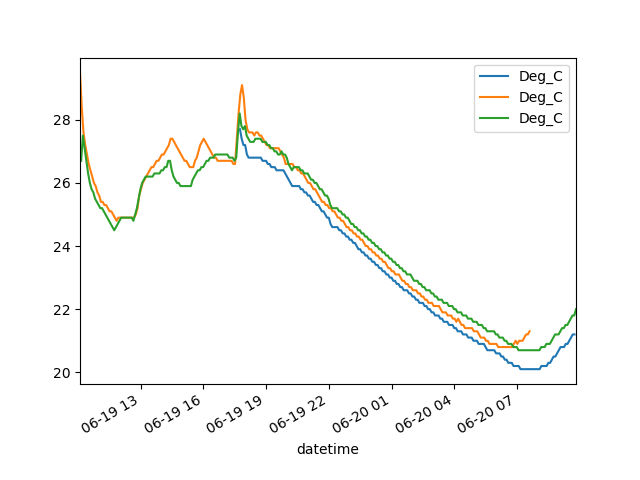

In [62]:
f,ax = plt.subplots()

data_1['Deg_C'].plot(ax=ax)
data_2['Deg_C'].plot(ax=ax)
data_3['Deg_C'].plot(ax=ax)

plt.legend()